# Imports

In [25]:
import os

from sudokusolver.aimodels import solver ,solver_test
from sudokusolver.detectboard.processimage import extract_sudoku_squares , extract_board, create_board_array
from sudokusolver.detectboard.loadimage import get_all_img_files, read_imgs_from_files
from sudokusolver.classifydigits.imageviz import display_img , plot_comparison
from sudokusolver.solvedboard.createsolvedigits import create_solved_board

from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import cv2

from datetime import datetime
from pathlib import Path
from typing import List, Tuple, Union



# Load Models

In [26]:
digit_classifier = tf.keras.models.load_model("digit_classifier_model/digit_classifier_vgg16.hdf5")
cnn_model_solve = tf.keras.models.load_model("sudoku_solver_models/best_sudoku_solver_test_training_full_set_puzzles_629.h5")

# Load Images

In [32]:
BOARD_RESIZE_DIM = 2520

fill_image_files = get_all_img_files('solution_digits')
fill_image_dict = dict(zip(range(1,10),read_imgs_from_files(fill_image_files)))

game_board_files = get_all_img_files('blockbuster_book_of_sudoku_images')
game_board_imgs = read_imgs_from_files(game_board_files)

# Select Random Board to Sample
sample_game_index = np.random.randint(0,len(game_board_imgs))
sample_game = game_board_imgs[sample_game_index]




# Display Unsolved Board Picture

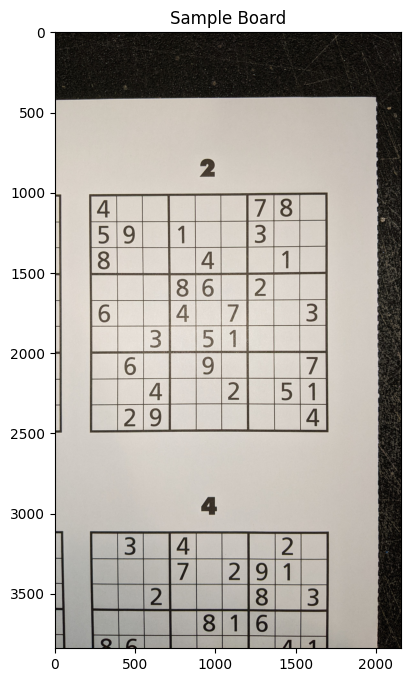

In [33]:
display_img(sample_game, title = 'Sample Board', fig_size = (10,8))

# Show Detected Board

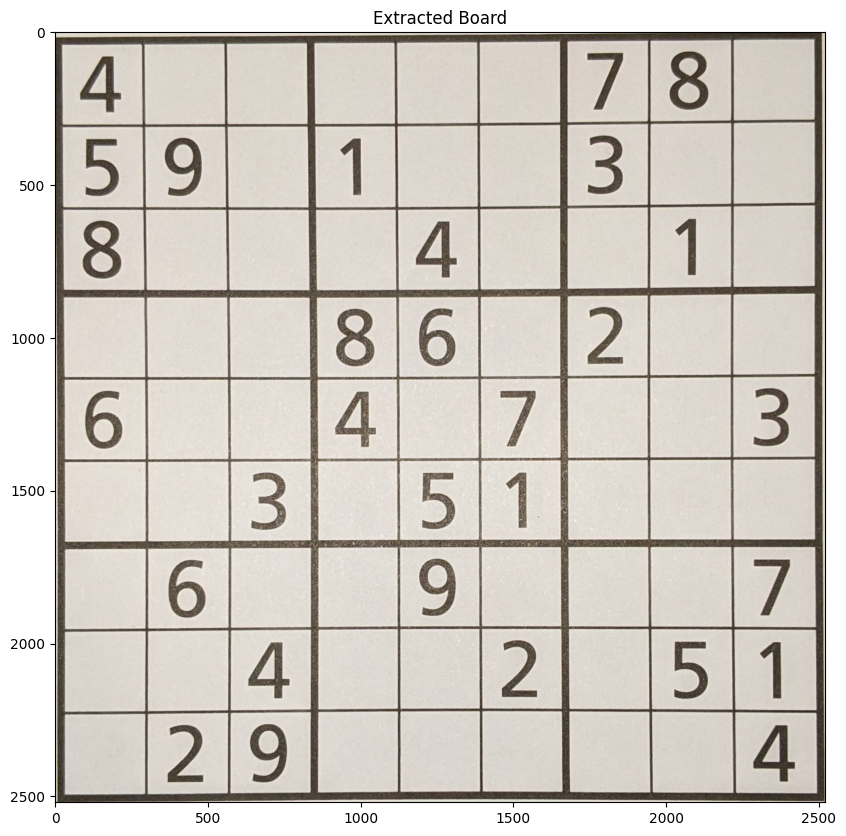

In [35]:
unsolved_board_img = extract_board(sample_game )
display_img(unsolved_board_img, title = 'Extracted Board' , fig_size = (12,10))

# Create Unsolved Board Array

In [36]:
square_dict = extract_sudoku_squares(unsolved_board_img , BOARD_RESIZE_DIM)
squares = list(square_dict.values())
unsolved_board_array = create_board_array(squares,classifier_model=digit_classifier)
unsolved_board_array

array([[4, 0, 0, 0, 0, 0, 7, 8, 0],
       [5, 9, 0, 1, 0, 0, 3, 0, 0],
       [8, 0, 0, 0, 4, 0, 0, 1, 0],
       [0, 0, 0, 8, 6, 0, 2, 0, 0],
       [6, 0, 0, 4, 0, 7, 0, 0, 3],
       [0, 0, 3, 0, 5, 1, 0, 0, 0],
       [0, 6, 0, 0, 9, 0, 0, 0, 7],
       [0, 0, 4, 0, 0, 2, 0, 5, 1],
       [0, 2, 9, 0, 0, 0, 0, 0, 4]], dtype=int64)

# Use CNN to Solve Puzzle

In [37]:
solved_board_array = solver(unsolved_board_array, cnn_model_solve)
solved_board_array

Fixed Solution Space
Valid Solution


array([[4, 1, 6, 2, 3, 5, 7, 8, 9],
       [5, 9, 7, 1, 8, 6, 3, 4, 2],
       [8, 3, 2, 7, 4, 9, 5, 1, 6],
       [9, 4, 1, 8, 6, 3, 2, 7, 5],
       [6, 5, 8, 4, 2, 7, 1, 9, 3],
       [2, 7, 3, 9, 5, 1, 4, 6, 8],
       [1, 6, 5, 3, 9, 4, 8, 2, 7],
       [3, 8, 4, 6, 7, 2, 9, 5, 1],
       [7, 2, 9, 5, 1, 8, 6, 3, 4]], dtype=int64)

# Create Solved Board Image

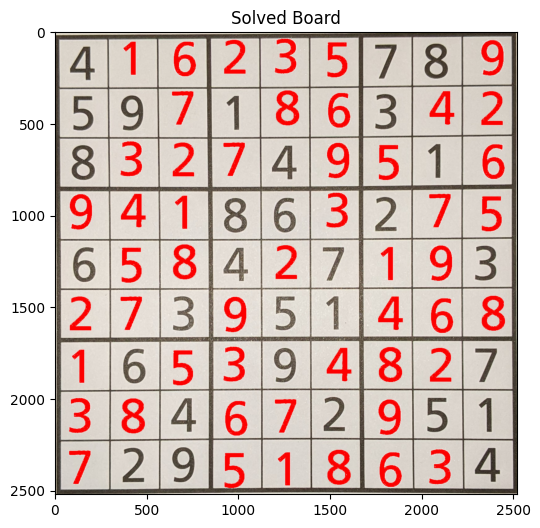

In [38]:
solved_board_img = create_solved_board(unsolved_board_img,unsolved_board_array, solved_board_array, square_dict, fill_image_dict)
display_img(solved_board_img, title = 'Solved Board')

# Compare Unsolved and Solved Puzzle

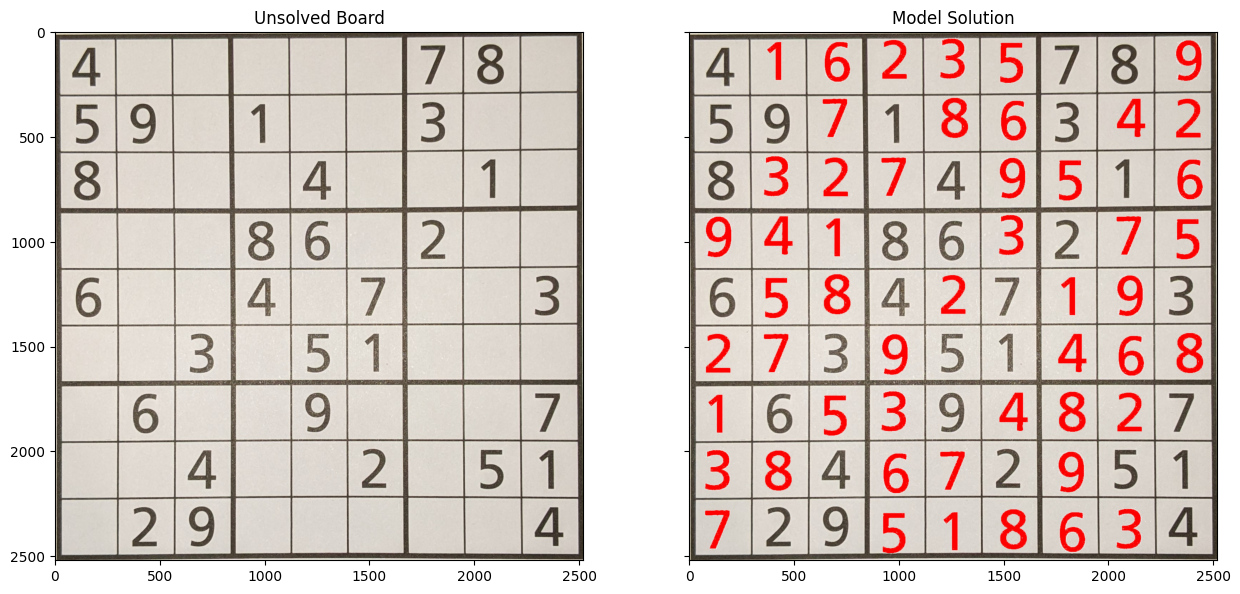

In [39]:
plot_comparison(unsolved_board_img, solved_board_img, title_0 = 'Unsolved Board' , title_1 = 'Model Solution', fig_size = (15,8))

In [40]:
!pip freeze

absl-py==1.2.0
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1660053721269/work/dist
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1640817743617/work
argon2-cffi-bindings @ file:///D:/bld/argon2-cffi-bindings_1649500515836/work
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1660605382950/work
astunparse==1.6.3
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1659291887007/work
Babel @ file:///home/conda/feedstock_root/build_artifacts/babel_1655419414885/work
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache @ file:///home/conda/feedstock_root/build_artifacts/backports.functools_lru_cache_1618230623929/work
beautifulsoup4 @ file:///home/conda/feedstock_root/build_artifacts/beautifulsoup4_1649463573192/work
bleach @ file:///home/conda/feedstock_root/build_artifacts/bleach_1656355450470/work
brotlipy @ file:///D:/bld/brotlipy_16488543